<a href="https://colab.research.google.com/github/codecat0/study-notes/blob/master/Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing stock ml libraries
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm


import torch

import logging
logging.basicConfig(level=logging.ERROR)

import matplotlib.pyplot as plt
import seaborn as sns

# 特征重要性分析

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Airbnb_healthy_building/Chicago/chicago_selected_features_train.csv')

In [7]:
data.head(1)

,listingId,sentiment,Lighting,View,Air Quality,Thermal Comfort,Dust & Pests,Safety & Security,Noise,Accessibility,...,bachelor_degree,median_household_income,white_alone_householder,black_alone_householder,vacancy_status,median_year_structure_built,utility_gas_house_heating_fuel,electricity,vehicles_available,median_house_value
0,42892605,positive,False,True,False,False,False,False,False,False,...,94,80130.0,329,99,96,1938,403,25,474,204200.0


In [8]:
print(data.shape)
print(data.columns)

(2460, 49)
Index(['listingId', 'sentiment', 'Lighting', 'View', 'Air Quality',
       'Thermal Comfort', 'Dust & Pests', 'Safety & Security', 'Noise',
       'Accessibility', 'Water Quality', 'price_value', 'meta_price_value',
       'reviews_count', 'beds', 'baths', 'bedrooms', 'guests', 'pets_allowed',
       'AccuracyRating', 'CheckinRating', 'CleanlinessRating',
       'CommunicationRating', 'LocationRating', 'ValueRating', 'wifi',
       'workspace', 'propertyType', 'city', 'rating_value', 'IECC_Clima',
       'IECC_Moist', 'BA_Climate', 'lat', 'lng', 'LCZ_Class', 'owner_occupied',
       'renter_occupied', 'median_age', 'bachelor_degree',
       'median_household_income', 'white_alone_householder',
       'black_alone_householder', 'vacancy_status',
       'median_year_structure_built', 'utility_gas_house_heating_fuel',
       'electricity', 'vehicles_available', 'median_house_value'],
      dtype='object')


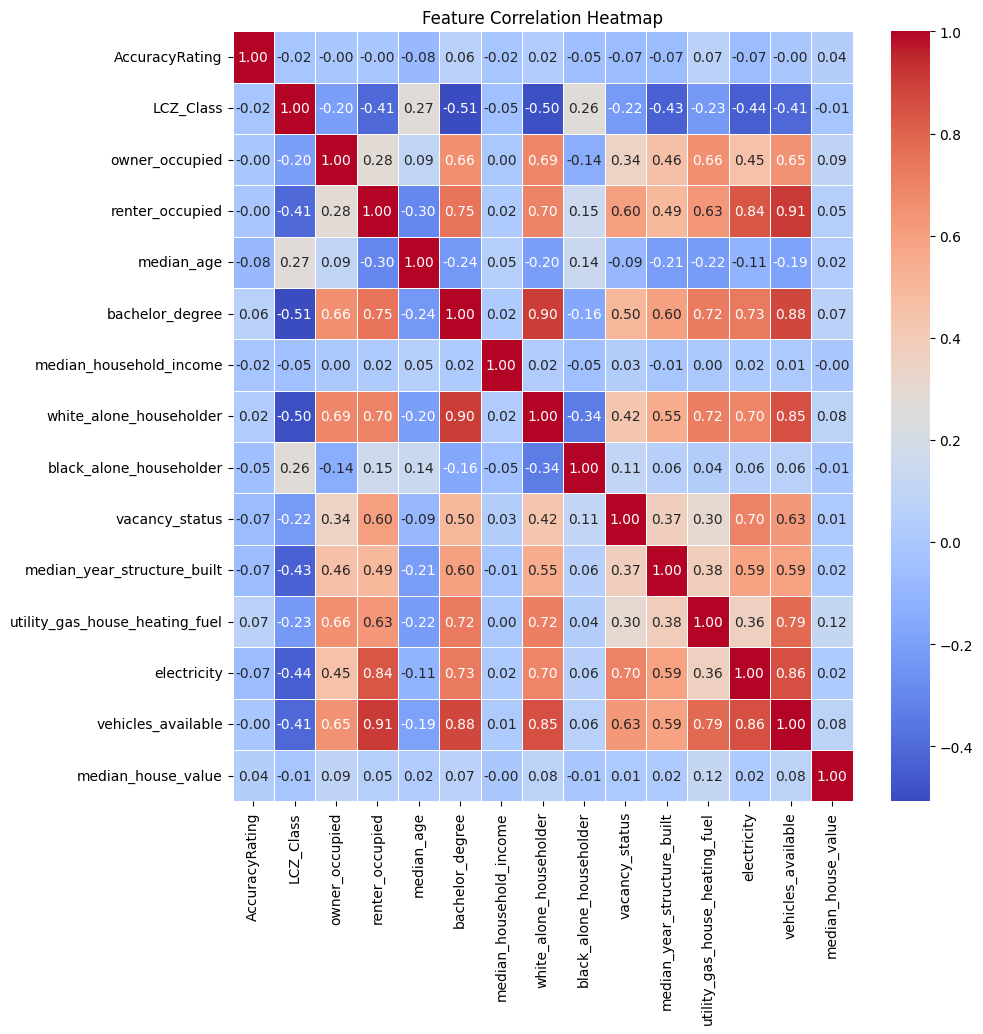

In [55]:
data_selected = data[['AccuracyRating', 'LCZ_Class', 'owner_occupied',
       'renter_occupied', 'median_age', 'bachelor_degree',
       'median_household_income', 'white_alone_householder',
       'black_alone_householder', 'vacancy_status',
       'median_year_structure_built', 'utility_gas_house_heating_fuel',
       'electricity', 'vehicles_available', 'median_house_value']]

correlation_matrix = data_selected.corr()


plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
X = data[['LCZ_Class', 'owner_occupied',
       'renter_occupied', 'median_age', 'bachelor_degree',
       'median_household_income', 'white_alone_householder',
       'black_alone_householder', 'vacancy_status',
       'median_year_structure_built', 'utility_gas_house_heating_fuel',
       'electricity', 'vehicles_available', 'median_house_value']]

y = data['AccuracyRating']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [11]:
X = pd.get_dummies(X, drop_first=True)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [12]:
scaler = StandardScaler()
X_imputed = scaler.fit_transform(X_imputed)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

In [15]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
feature_importances = rf_regressor.feature_importances_

In [16]:
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

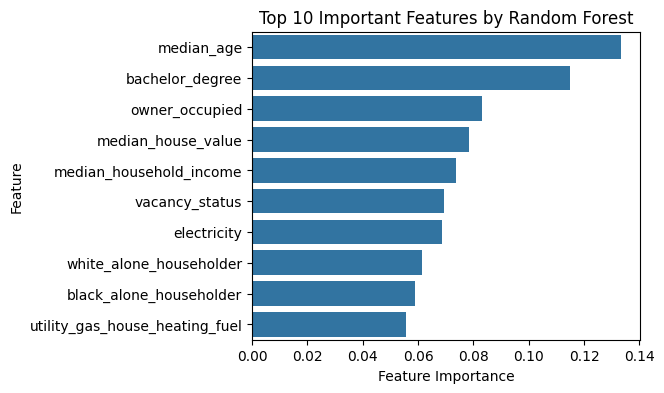

In [17]:
plt.figure(figsize=(5, 4))
sns.barplot(x="Importance", y="Feature", data=feature_importances_df.head(10))
plt.title("Top 10 Important Features by Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.008889269030609976
Root Mean Squared Error (RMSE): 0.09428292014256864
R² Score: 0.5941463327980026


In [19]:
feature_importances_df.to_csv('/content/drive/MyDrive/chicago_AccuracyRating_feature_importances.csv')

# 相关性分析

In [39]:
corr_data = pd.read_csv('/content/drive/MyDrive/Airbnb_healthy_building/Chicago/chicago_train.csv')

In [22]:
corr_data.head(1)

,listingId,review,sentiment,Lighting,View,Air Quality,Thermal Comfort,Dust & Pests,Safety & Security,Noise,...,bachelor_degree,median_household_income,white_alone_householder,black_alone_householder,vacancy_status,median_year_structure_built,utility_gas_house_heating_fuel,electricity,vehicles_available,median_house_value
0,42892605,"beautiful interior design, books everywhere an...",positive,False,True,False,False,False,False,False,...,94,80130.0,329,99,96,1938,403,25,474,204200.0


In [23]:
print(corr_data.shape)
print(corr_data.columns)

(2460, 76)
Index(['listingId', 'review', 'sentiment', 'Lighting', 'View', 'Air Quality',
       'Thermal Comfort', 'Dust & Pests', 'Safety & Security', 'Noise',
       'Accessibility', 'Water Quality', 'clean_text', 'text_tokenized',
       'text_tokenized_nopunc', 'POS_tagging_flat', 'lemmatization', 'labels',
       'title', 'price_currency', 'price_symbol', 'price_value',
       'meta_price_currency', 'meta_price_symbol', 'meta_price_value',
       'description', 'category', 'discount', 'reviews_count', 'breadcrumbs',
       'location', 'description_items', 'beds', 'baths', 'bedrooms', 'guests',
       'pets_allowed', 'category.1', 'AccuracyRating', 'CheckinRating',
       'CleanlinessRating', 'CommunicationRating', 'LocationRating',
       'ValueRating', 'rules', 'details', 'highlights', 'wifi', 'workspace',
       'neighborhood', 'nearbyCities', 'amenities', 'propertyType', 'city',
       'state', 'rating_value', 'IECC_Clima', 'IECC_Moist', 'BA_Climate',
       'lat', 'lng', 'bloc

In [41]:
numeric_columns = corr_data.select_dtypes(include=['number'])
numeric_columns.columns

Index(['listingId', 'price_value', 'meta_price_value', 'discount',
       'reviews_count', 'bedrooms', 'guests', 'AccuracyRating',
       'CheckinRating', 'CleanlinessRating', 'CommunicationRating',
       'LocationRating', 'ValueRating', 'rating_value', 'IECC_Clima', 'lat',
       'lng', 'block_group', 'LCZ_Class', 'owner_occupied', 'renter_occupied',
       'median_age', 'bachelor_degree', 'median_household_income',
       'white_alone_householder', 'black_alone_householder', 'vacancy_status',
       'median_year_structure_built', 'utility_gas_house_heating_fuel',
       'electricity', 'vehicles_available', 'median_house_value'],
      dtype='object')

In [42]:
bool_columns = corr_data.select_dtypes(include=['bool'])
bool_columns.columns

Index(['Lighting', 'View', 'Air Quality', 'Thermal Comfort', 'Dust & Pests',
       'Safety & Security', 'Noise', 'Accessibility', 'Water Quality',
       'category', 'pets_allowed', 'category.1', 'wifi', 'workspace'],
      dtype='object')

In [50]:
corr_data_selected = corr_data[['sentiment', 'Lighting', 'View', 'Air Quality', 'Thermal Comfort', 'Dust & Pests',
       'Safety & Security', 'Noise', 'Accessibility', 'Water Quality',
       'category', 'pets_allowed', 'category.1', 'wifi', 'workspace', 'price_value', 'meta_price_value', 'discount',
       'reviews_count', 'bedrooms', 'guests', 'AccuracyRating',
       'CheckinRating', 'CleanlinessRating', 'CommunicationRating',
       'LocationRating', 'ValueRating', 'rating_value', 'IECC_Clima', 'lat',
       'lng', 'block_group', 'LCZ_Class', 'owner_occupied', 'renter_occupied',
       'median_age', 'bachelor_degree', 'median_household_income',
       'white_alone_householder', 'black_alone_householder', 'vacancy_status',
       'median_year_structure_built', 'utility_gas_house_heating_fuel',
       'electricity', 'vehicles_available', 'median_house_value' ]]
drop_columns = ['category', 'category.1', 'discount','IECC_Clima']
corr_data_selected = corr_data_selected.drop(drop_columns, axis=1)
corr_data_selected.head(1)

,sentiment,Lighting,View,Air Quality,Thermal Comfort,Dust & Pests,Safety & Security,Noise,Accessibility,Water Quality,...,bachelor_degree,median_household_income,white_alone_householder,black_alone_householder,vacancy_status,median_year_structure_built,utility_gas_house_heating_fuel,electricity,vehicles_available,median_house_value
0,positive,False,True,False,False,False,False,False,False,False,...,94,80130.0,329,99,96,1938,403,25,474,204200.0


In [51]:
print(corr_data_selected.shape)
print(corr_data_selected.columns)

(2460, 42)
Index(['sentiment', 'Lighting', 'View', 'Air Quality', 'Thermal Comfort',
       'Dust & Pests', 'Safety & Security', 'Noise', 'Accessibility',
       'Water Quality', 'pets_allowed', 'wifi', 'workspace', 'price_value',
       'meta_price_value', 'reviews_count', 'bedrooms', 'guests',
       'AccuracyRating', 'CheckinRating', 'CleanlinessRating',
       'CommunicationRating', 'LocationRating', 'ValueRating', 'rating_value',
       'lat', 'lng', 'block_group', 'LCZ_Class', 'owner_occupied',
       'renter_occupied', 'median_age', 'bachelor_degree',
       'median_household_income', 'white_alone_householder',
       'black_alone_householder', 'vacancy_status',
       'median_year_structure_built', 'utility_gas_house_heating_fuel',
       'electricity', 'vehicles_available', 'median_house_value'],
      dtype='object')


In [52]:
label_encoder = LabelEncoder()
corr_data_selected['sentiment'] = label_encoder.fit_transform(corr_data_selected['sentiment'])

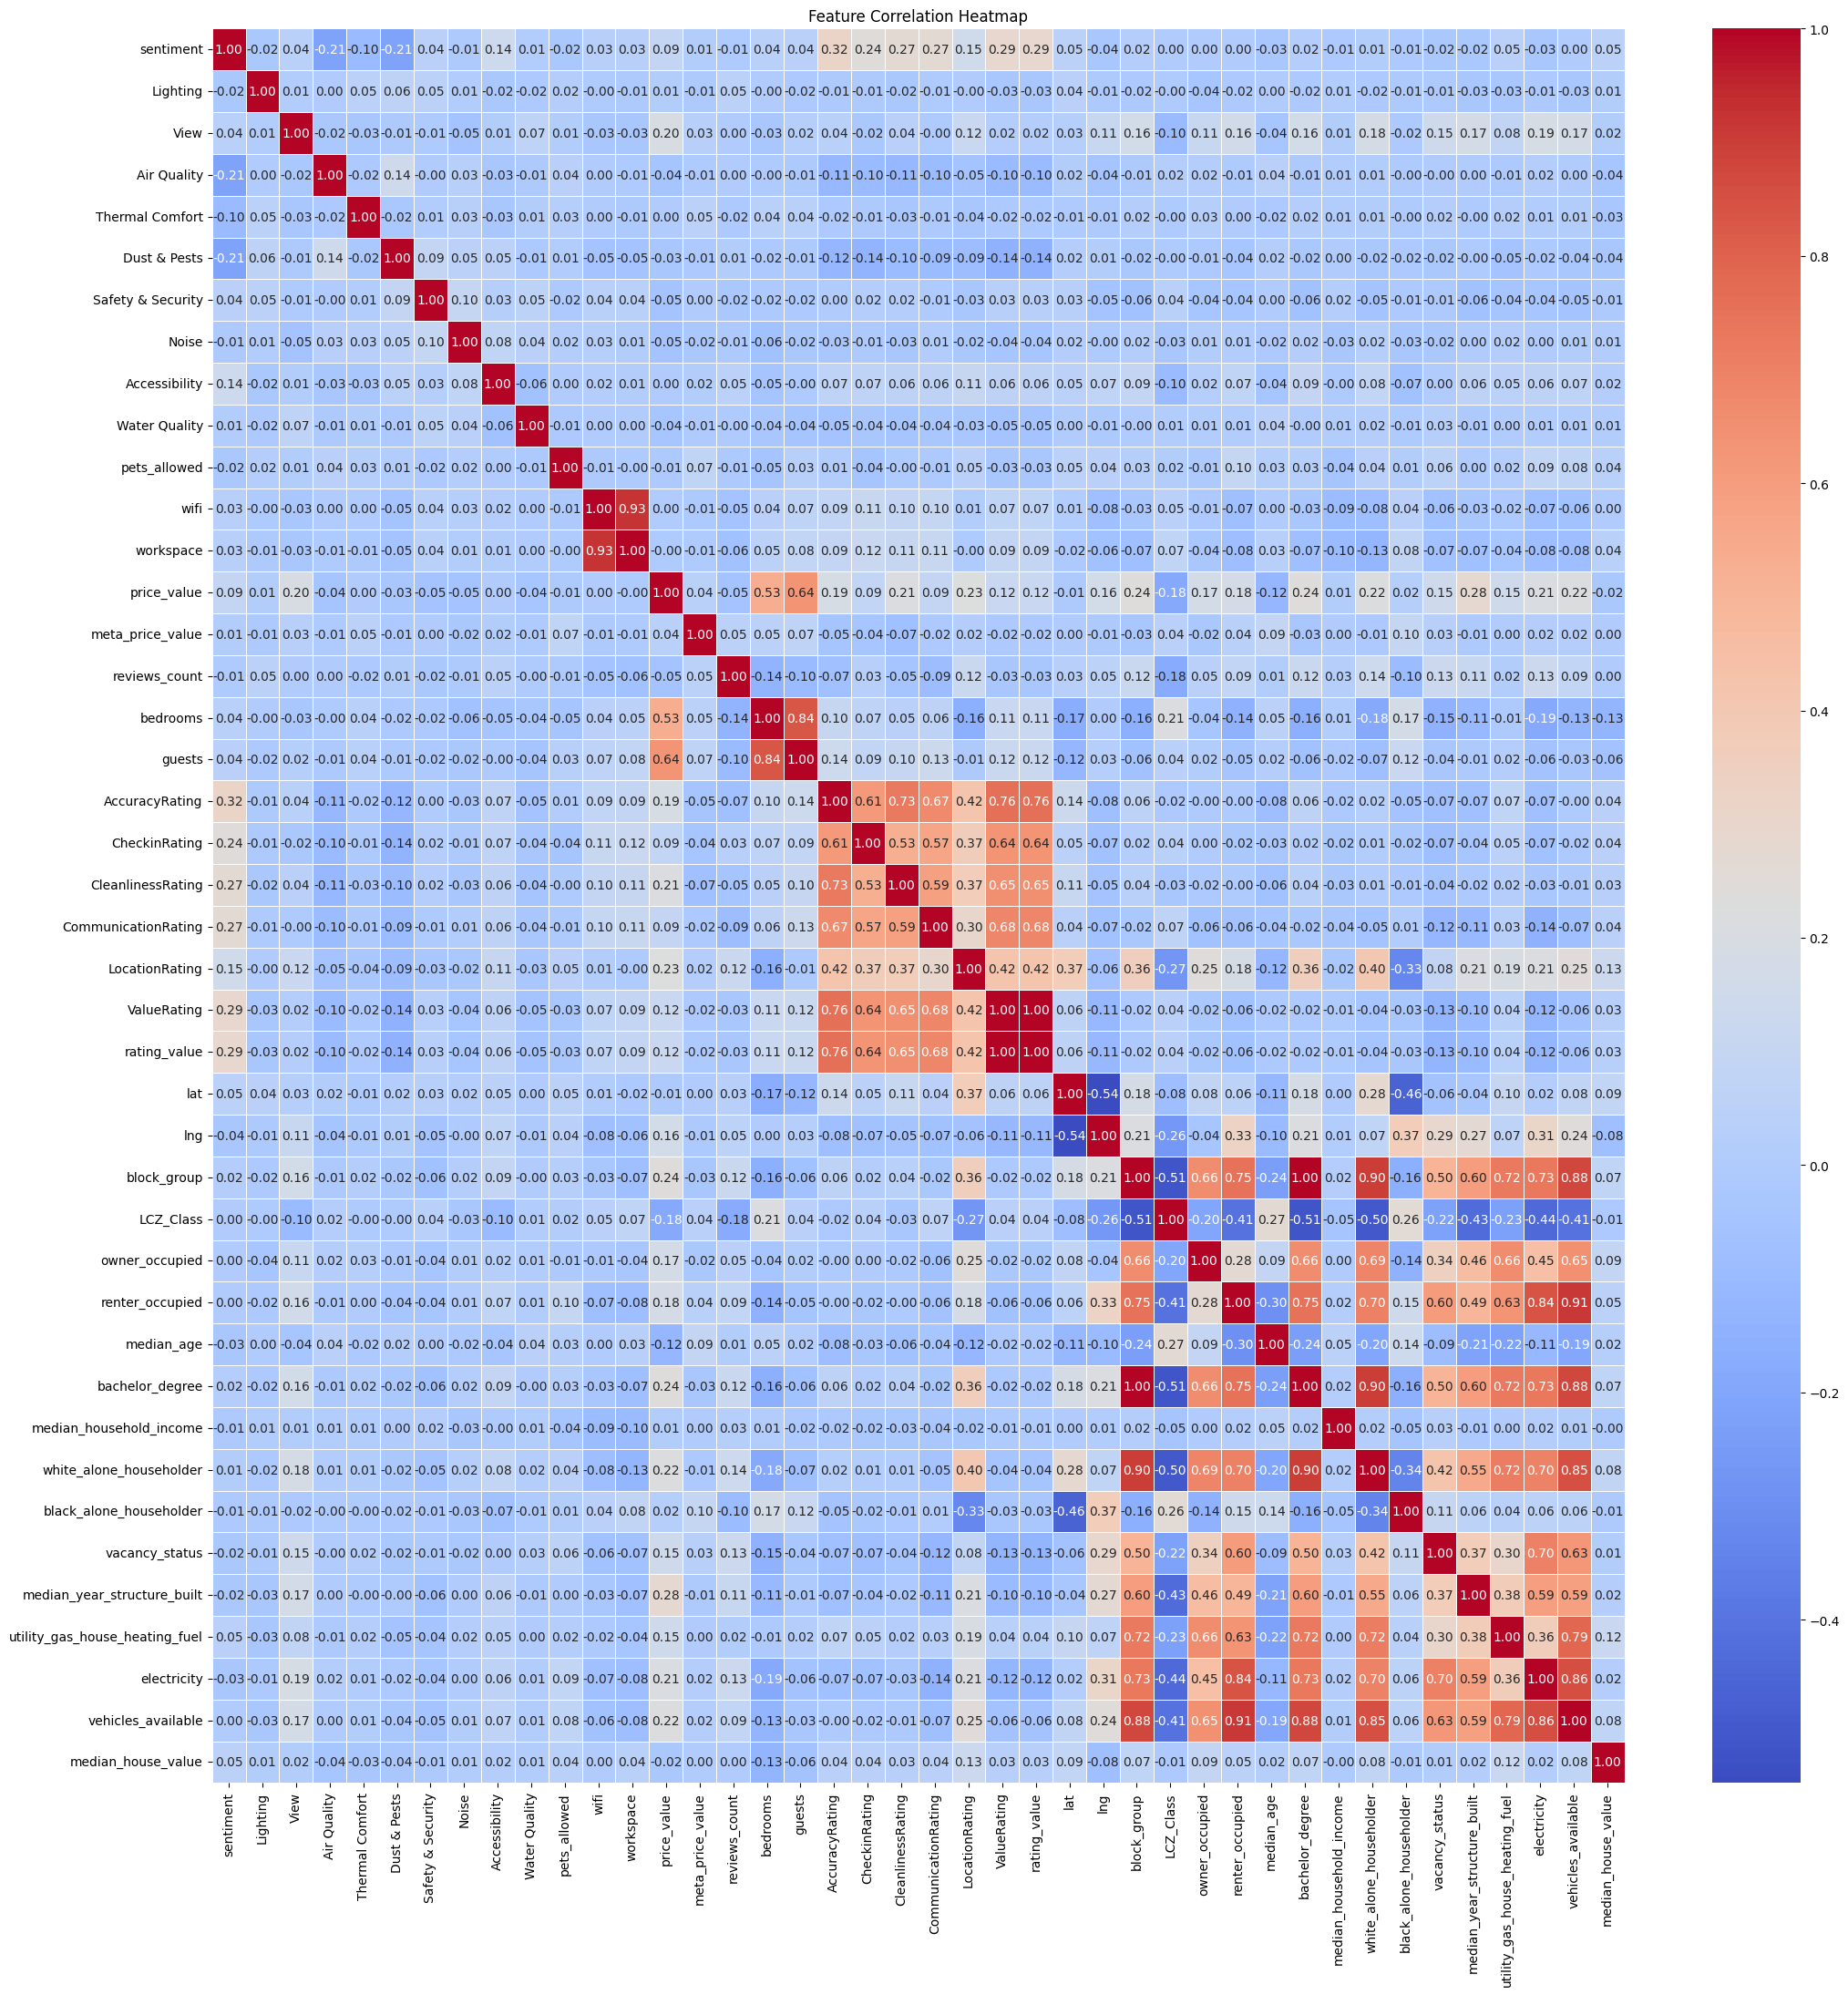

In [53]:
# 计算皮尔逊相关系数矩阵
correlation_matrix = corr_data_selected.corr()

# 使用 Seaborn 绘制热力图
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()